In [1]:
import numpy as np
from skimage import io
from itertools import count
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def plot_grid(imgs, titles, rows, cols, figsize):
    fig, axs = plt.subplots(rows, cols, figsize=figsize) # Cria um grid para as imgs
    for a, i, t in zip(axs.flatten(), imgs, titles):
        # Adiciona uma imagem (i) na posição correta (a):
        a.imshow(i, cmap='gray', aspect='equal', interpolation=None, vmin=0, vmax=255)
        a.set_title(t)
    # Desativa o eixo das imagens (separado pois o número de imgs pode não preencher o grid):
    for a in axs.flatten(): a.set_axis_off()

    plt.tight_layout()
    plt.show()
    return fig, axs


def save_imgs(imgs, prefix):
    for img, suffix in zip(imgs, count(start=1)):
        io.imsave(prefix + str(suffix) + '.png', img.astype(np.uint8), check_contrast=False)

**1.1   Transformação de Intensidade**

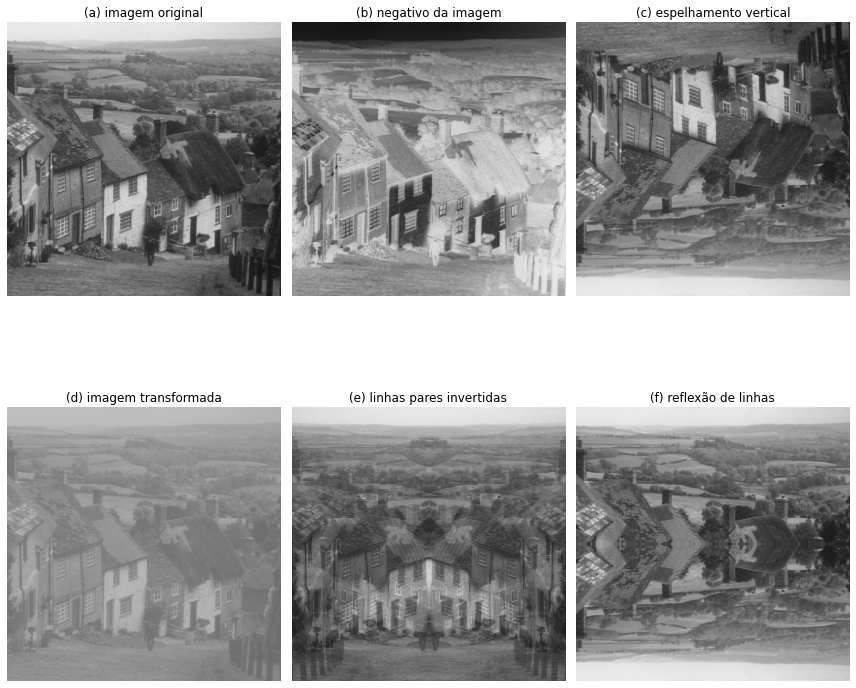

In [3]:
imgs = []
titles = ['(a) imagem original', '(b) negativo da imagem', '(c) espelhamento vertical',
          '(d) imagem transformada', '(e) linhas pares invertidas', '(f) reflexão de linhas']

# a) Imagem monocromática:
original = io.imread('./city.png', as_gray=True)
imgs.append(original)

# b) Negativo da imagem:
negativo = 255 - original
imgs.append(negativo)

# c) Espelhamento vertical:
esp_vert = np.flipud(original)
imgs.append(esp_vert)

# d) Conversão do intervalo de intensidades para [100, 200]:
conv_int = (original / 2.55 + 100).astype(int)
# conv_int = np.minimum(np.maximum(original, 100), 200) # Teste
imgs.append(conv_int)

# e) Inversão das linhas pares:
inv_par = np.copy(original)
inv_par[::2] = inv_par[::2, ::-1]
imgs.append(inv_par)

# f) Reflexão de linhas:
refl = np.copy(original)
l, _ = refl.shape
m = l // 2  # Metade do número de linhas
refl[m::] = refl[m - 1::-1]
imgs.append(refl)

f1, axs1 = plot_grid(imgs, titles, 2, 3, (12, 12))
save_imgs(imgs, 'trab0-1.1-')

**1.2 Ajuste de Brilho**

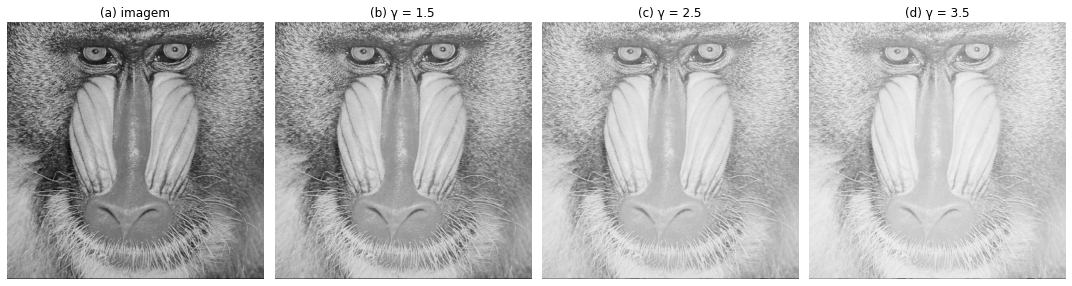

In [4]:
imgs = []
titles = ['(a) imagem', '(b) γ = 1.5', '(c) γ = 2.5', '(d) γ = 3.5']

# Imagem original:
original = io.imread('./baboon.png', as_gray=True)
imgs.append(original)

# Imagem com pixeis mapeados para [0, 1]:
orig01 = original / 255

# Aplica ajuste de brilho:
γ15 = orig01 ** (1 / 1.5)
γ25 = orig01 ** (1 / 2.5)
γ35 = orig01 ** (1 / 3.5)

# Mapeia de volta para o intervalo [0, 255]:
γ15 = (γ15 * 255).astype(int)
imgs.append(γ15)
γ25 = (γ25 * 255).astype(int)
imgs.append(γ25)
γ35 = (γ35 * 255).astype(int)
imgs.append(γ35)

f1, axs1 = plot_grid(imgs, titles, 1, 4, (15, 15))
save_imgs(imgs, 'trab0-1.2-')

**1.3 Planos de Bits**

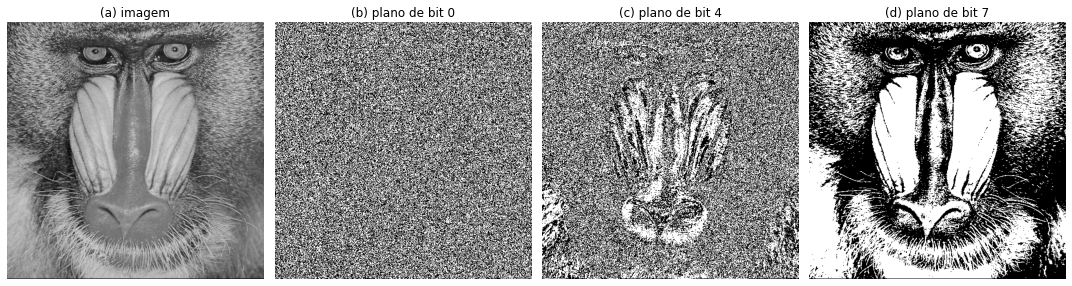

In [5]:
imgs = []
titles = ['(a) imagem', '(b) plano de bit 0', '(c) plano de bit 4', '(d) plano de bit 7']

# Imagem original:
original = io.imread('./baboon.png', as_gray=True)
imgs.append(original)

# Filtra os bits de cada plano:
p0 = (original & (1 << 0)) >> 0
p4 = (original & (1 << 4)) >> 4
p7 = (original & (1 << 7)) >> 7

# Salva os planos na forma binária:
save_imgs([original, p0, p4, p7], 'trab0-1.3-')

# Cria a visualização dos planos de bits onde 1 é a intensidade máxima:
p0 *= 255
p4 *= 255
p7 *= 255
imgs.append(p0)
imgs.append(p4)
imgs.append(p7)

f1, axs1 = plot_grid(imgs, titles, 1, 4, (15, 15))

**1.4 Mosaico**

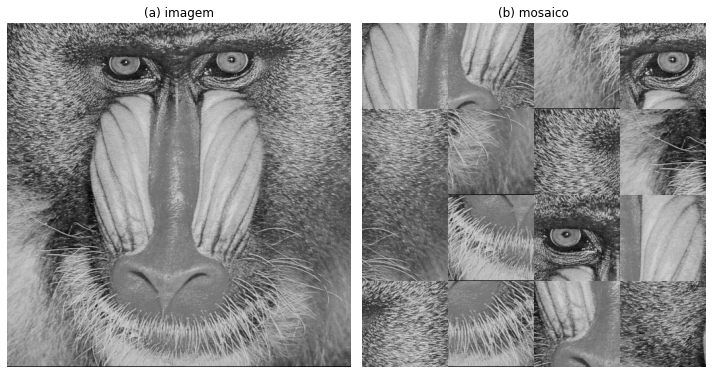

In [6]:
titles = ['(a) imagem', '(b) mosaico']

# Imagem original:
original = io.imread('./baboon.png', as_gray=True)

# Cria mosaico:
nb = 4  # Número de blocos em cada dimensão
linhas, colunas = original.shape  # Dimensões da imagem
lb, cb = linhas // nb, colunas // nb  # Dimensões dos blocos

# A partir de uma permutação dos blocos cria uma lista que contem
# a coordenada incial de cada bloco:
# Ex. Bloco 12 -> (256, 384)
permutacao = [5, 10, 12, 2, 7, 15, 0, 8, 11, 13, 1, 6, 3, 14, 9, 4]
indices_perm = ((p // nb * lb, p % nb * cb) for p in permutacao)

mosaico = np.empty(original.shape)
for i in range(0, nb * lb, lb):
    for j in range(0, nb * cb, cb):
        bi, bj = next(indices_perm)
        mosaico[i:i + lb, j:j + cb] = original[bi:bi + lb, bj:bj + cb]

imgs = [original, mosaico]
f1, axs1 = plot_grid(imgs, titles, 1, 2, (10, 10))
save_imgs(imgs, 'trab0-1.4-')

**1.5 Combinação de Imagens**

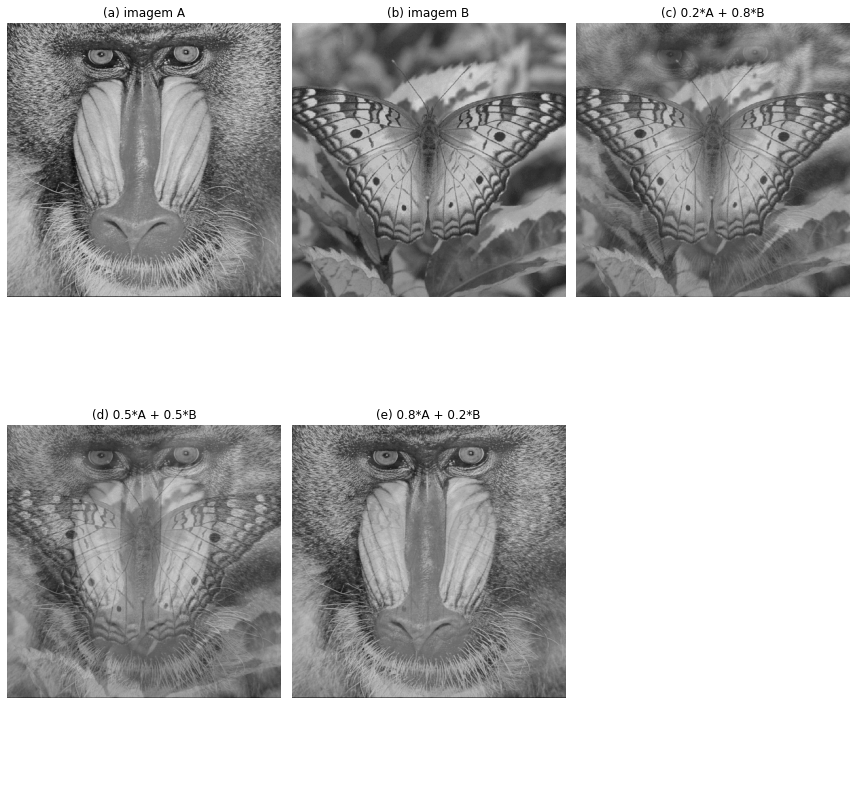

In [37]:
titles = ['(a) imagem A', '(b) imagem B', '(c) 0.2*A + 0.8*B', '(d) 0.5*A + 0.5*B', '(e) 0.8*A + 0.2*B']

# Imagens originais:
A = io.imread('./baboon.png', as_gray=True)
B = io.imread('./butterfly.png', as_gray=True)
imgs = [A, B]

# Cria as combinações:
imgs.append((0.2*A + 0.8*B).astype(int).clip(0, 255))
imgs.append((0.5*A + 0.5*B).astype(int).clip(0, 255))
imgs.append((0.8*A + 0.2*B).astype(int).clip(0, 255))

f1, axs1 = plot_grid(imgs, titles, 2, 3, (12, 12))
save_imgs(imgs, 'trab0-1.5-')